In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)


In [18]:
# View all of the classes that automap found
Base.classes.keys ()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [9]:
 # Display the row's columns and data in dictionary format
session.query(func.count(measurement.date)).all()

session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23',)

In [10]:
first_row = session.query(measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1f63e73d910>,
 'id': 0,
 'station': 'USC00519397',
 'date': '2010-01-01',
 'prcp': 2.0,
 'tobs': 18.3}

In [11]:
# Exploratory Precipitation Analysis

In [16]:
precipitation = session.query(measurement.prcp, measurement.date).\
    filter(measurement.date > '2016-08-23').\
    order_by(measurement.date).all()
precipitation


[(2.0, '2016-08-24'),
 (54.6, '2016-08-24'),
 (57.9, '2016-08-24'),
 (None, '2016-08-24'),
 (31.0, '2016-08-24'),
 (54.6, '2016-08-24'),
 (36.8, '2016-08-24'),
 (2.0, '2016-08-25'),
 (2.0, '2016-08-25'),
 (0.0, '2016-08-25'),
 (0.0, '2016-08-25'),
 (5.3, '2016-08-25'),
 (1.5, '2016-08-25'),
 (2.8, '2016-08-25'),
 (0.0, '2016-08-26'),
 (0.8, '2016-08-26'),
 (0.5, '2016-08-26'),
 (1.0, '2016-08-26'),
 (0.0, '2016-08-26'),
 (0.3, '2016-08-26'),
 (0.0, '2016-08-27'),
 (4.6, '2016-08-27'),
 (0.5, '2016-08-27'),
 (0.0, '2016-08-27'),
 (3.0, '2016-08-27'),
 (None, '2016-08-27'),
 (0.3, '2016-08-28'),
 (3.6, '2016-08-28'),
 (3.6, '2016-08-28'),
 (3.6, '2016-08-28'),
 (15.2, '2016-08-28'),
 (52.6, '2016-08-28'),
 (0.0, '2016-08-29'),
 (4.3, '2016-08-29'),
 (1.0, '2016-08-29'),
 (None, '2016-08-29'),
 (0.0, '2016-08-29'),
 (8.9, '2016-08-29'),
 (22.9, '2016-08-29'),
 (0.0, '2016-08-30'),
 (0.0, '2016-08-30'),
 (0.5, '2016-08-30'),
 (0.0, '2016-08-30'),
 (0.0, '2016-08-30'),
 (1.3, '2016-08-30'),

In [13]:
precipitation_df = pd.DataFrame([{'Precipitation': obj.prcp, 'Date': obj.date} for obj in precipitation])
precipitation_df

,Precipitation,Date
0,2.0,2016-08-24
1,54.6,2016-08-24
2,57.9,2016-08-24
3,NaN,2016-08-24
4,31.0,2016-08-24
...,...,...
2218,12.7,2017-08-22
2219,0.0,2017-08-23
2220,0.0,2017-08-23
2221,2.0,2017-08-23


In [14]:
precip_date_df = precipitation_df.groupby('Date')['Precipitation'].agg(np.mean)
precip_date_df


Date
2016-08-24    39.483333
2016-08-25     1.942857
2016-08-26     0.433333
2016-08-27     1.620000
2016-08-28    13.150000
                ...    
2017-08-19     0.766667
2017-08-20     0.150000
2017-08-21     4.900000
2017-08-22     4.233333
2017-08-23     3.350000
Name: Precipitation, Length: 365, dtype: float64

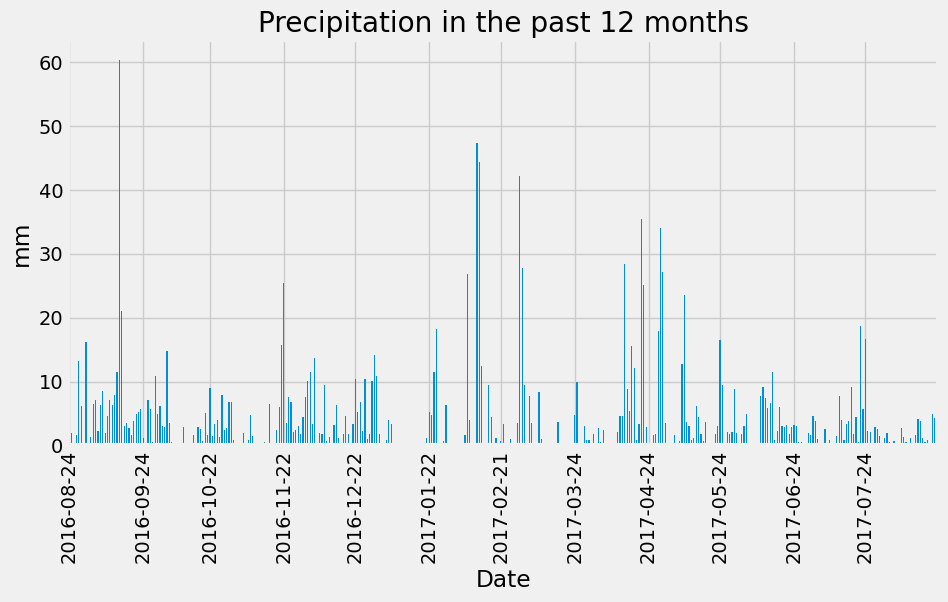

In [15]:
import matplotlib.dates as mdates
# Set the figure size
plt.figure(figsize=(10, 5))

# Plot the bar chart
ax = precip_date_df.plot.bar(x='Date', y='Precipitation', legend=False)

# Set the x-axis tick frequency
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))


# Set the x-axis label, y-axis label, and plot title
plt.xlabel("Date")
plt.ylabel("mm")
plt.title("Precipitation in the past 12 months")

plt.show()

In [16]:
precipitation_df.describe()

,Precipitation
count,2015.000000
mean,4.485112
std,11.690532
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [21]:
# Design a query to calculate the total number of stations in the dataset
stations = session.query(measurement).group_by(measurement.station).count()
print(stations)

9


In [22]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
stations_list = session.query(measurement.station, func.sum(measurement.id)).\
    group_by(measurement.station).\
order_by(func.sum(measurement.id).desc()).all()
stations_list

[('USC00516128', 47652022),
 ('USC00519281', 37622970),
 ('USC00511918', 31561092),
 ('USC00519523', 28963988),
 ('USC00514830', 14386767),
 ('USC00517948', 11415726),
 ('USC00513117', 11047302),
 ('USC00518838', 4732882),
 ('USC00519397', 3708726)]

In [29]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min (measurement.tobs), func.max (measurement.tobs),func.avg (measurement.tobs)).\
    filter(measurement.station == 'USC00516128').\
order_by(func.max(measurement.tobs).desc()).first()

(14.4, 28.9, 21.62166921898927)

In [32]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

session.query(measurement.date).\
filter(measurement.station == 'USC00516128', ).\
order_by(measurement.date.desc()).first()

('2017-08-23',)

In [38]:
temperature = session.query(measurement.tobs).\
filter(measurement.station == 'USC00516128', measurement.date > '2016-08-23').\
order_by(measurement.date.desc()).all()
temperature

[(24.4,),
 (24.4,),
 (24.4,),
 (25.6,),
 (21.7,),
 (24.4,),
 (22.2,),
 (21.7,),
 (21.1,),
 (26.1,),
 (26.7,),
 (23.3,),
 (22.2,),
 (23.9,),
 (21.7,),
 (23.3,),
 (25.6,),
 (26.1,),
 (25.0,),
 (24.4,),
 (26.7,),
 (22.2,),
 (23.3,),
 (26.1,),
 (25.0,),
 (22.8,),
 (23.9,),
 (22.8,),
 (26.1,),
 (25.0,),
 (25.6,),
 (22.2,),
 (22.2,),
 (23.9,),
 (23.3,),
 (25.0,),
 (22.2,),
 (23.9,),
 (25.6,),
 (24.4,),
 (25.0,),
 (22.2,),
 (23.3,),
 (25.0,),
 (25.6,),
 (21.7,),
 (23.3,),
 (23.3,),
 (23.9,),
 (25.0,),
 (25.0,),
 (25.6,),
 (23.3,),
 (23.9,),
 (24.4,),
 (23.3,),
 (23.3,),
 (26.1,),
 (26.1,),
 (22.8,),
 (21.7,),
 (24.4,),
 (23.9,),
 (23.3,),
 (24.4,),
 (25.0,),
 (22.2,),
 (23.3,),
 (25.0,),
 (23.3,),
 (22.8,),
 (23.3,),
 (24.4,),
 (22.2,),
 (23.9,),
 (26.1,),
 (23.3,),
 (23.3,),
 (25.0,),
 (23.3,),
 (23.3,),
 (22.2,),
 (22.8,),
 (22.2,),
 (22.2,),
 (23.9,),
 (21.1,),
 (20.6,),
 (22.2,),
 (20.6,),
 (21.1,),
 (20.6,),
 (21.7,),
 (21.7,),
 (22.2,),
 (21.1,),
 (21.7,),
 (21.1,),
 (25.6,),
 (22.2,),


In [39]:
temperature_df = pd.DataFrame(temperature)
temperature_df

,tobs
0,24.4
1,24.4
2,24.4
3,25.6
4,21.7
...,...
343,25.6
344,21.7
345,23.3
346,25.0


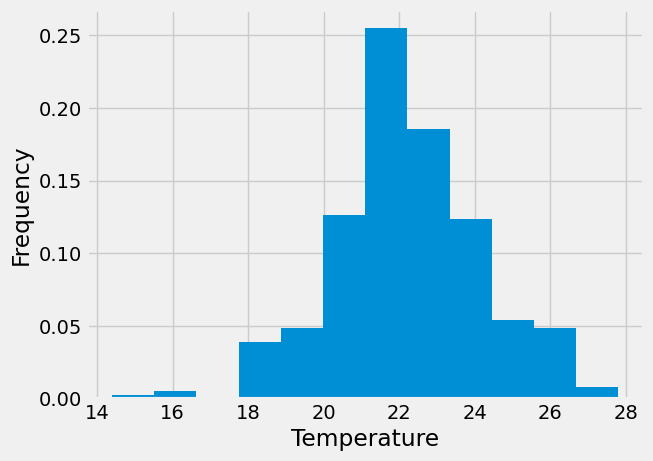

In [53]:
x = temperature_df["tobs"]

plt.hist(x, density=True, bins=12)
plt.ylabel('Frequency')
plt.xlabel('Temperature');

plt.show()

# Close Session

In [16]:
# Close Session
session.close()